This notebook shows the data analasys with prediction work for the income based on the OBESITY dataset where no fairness assumptions are made

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('../')

In [3]:
obesity_dataset = pd.read_csv('./obesity_level.csv', sep=',')

In [4]:
from fairness.pre_processing import categorical_to_numeric_converter, fix_attributes


new_obesity_dataset = categorical_to_numeric_converter(obesity_dataset)

In [5]:
new_obesity_dataset

Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     2      0  2.000000    0  0.000000  1.000000     3   
1        0   3.0  3.0     2      1  3.000000    1  3.000000  0.000000     2   
2        0   2.0  3.0     2      0  2.000000    0  2.000000  1.000000     1   
3        0   3.0  3.0     2      0  2.000000    0  2.000000  0.000000     1   
4        0   2.0  1.0     2      0  2.000000    0  0.000000  0.000000     2   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106     1   3.0  3.0     2      0  1.728139    0  1.676269  0.906247     2   
2107     1   3.0  3.0     2      0  2.005130    0  1.341390  0.599270     2   
2108     1   3.0  3.0     2      0  2.054193    0  1.414209  0.646288     2   
2109     1   3.0  3.0     2      0  2.852339    0  1.139107  0.586035     2   
2110     1   3.0  3.0     2      0  2.863513    0  1.026452  0.714137     2   

      MTRANS  Obesity  
0          3        0  
1          3        0  
2          3        0  
3          4        0  
4          3        0  
...      ...      ...  
2106       3        1  
2107       3        1  
2108       3        1  
2109       3        1  
2110       3        1  

[2111 rows x 17 columns]

After the pre-processing step for the dataset it's the time to perform the training and make the proper prediction.
The first step to perform this task is to split the dataset into training set and test set.

In [6]:
from sklearn.model_selection import train_test_split

X = new_obesity_dataset.drop(columns=['Obesity'], inplace=False)
y = new_obesity_dataset['Obesity']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

After the split of the dataset, the next step is to perform the calculations of the best parameters for the several models we want to use for the prediction step.Since this is a problem of multiclass classification, the chosen models are the following:

* RandomForest Classifier
* Logistic Regression
* DecisionTree Classifier

The best params for the RandomForest Classifier are:  {'criterion': 'log_loss', 'max_depth': 40, 'max_leaf_nodes': 40, 'n_estimators': 50}


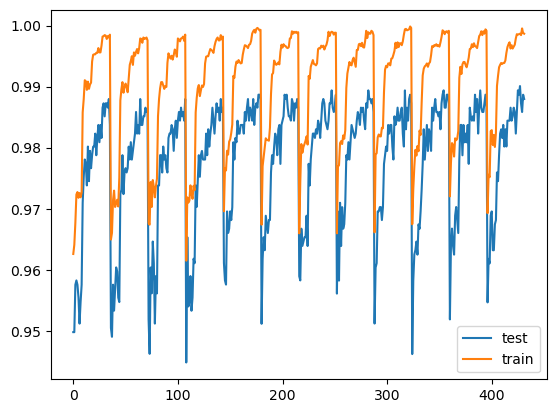

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest_model = RandomForestClassifier()
random_forest_params = {'n_estimators': range(10, 100, 10), 'criterion': ['gini', 'entropy', 'log_loss'], 
                        'max_depth': range(10, 50, 10), 'max_leaf_nodes': range(10, 50, 10)}

grid_search = GridSearchCV(random_forest_model, param_grid=random_forest_params, cv=10, return_train_score=True)
random_forest = grid_search.fit(X_train, y_train)

print("The best params for the RandomForest Classifier are: ", random_forest.best_params_)

test_scores = random_forest.cv_results_['mean_test_score']
train_scores = random_forest.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Accuracy for random_forest:  0.9856527977044476


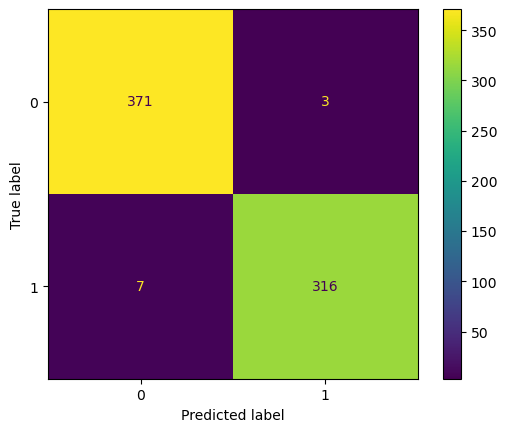

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

predicted_result = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, predicted_result)
print("Accuracy for random_forest: ", accuracy)

matrix = confusion_matrix(y_test, predicted_result, labels=random_forest.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=random_forest.classes_)
display.plot()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

The best params for the Logistic Regression are:  {'penalty': 'l2', 'solver': 'newton-cg'}


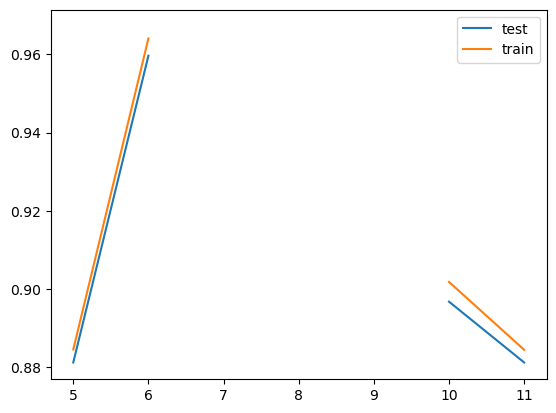

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression_model = LogisticRegression(multi_class='multinomial')
logistic_regression_params = {'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

grid_search = GridSearchCV(logistic_regression_model, param_grid=logistic_regression_params, cv=10, return_train_score=True)
logistic_regression = grid_search.fit(X_train, y_train)

print("The best params for the Logistic Regression are: ", logistic_regression.best_params_)

test_scores = logistic_regression.cv_results_['mean_test_score']
train_scores = logistic_regression.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Accuracy for logistic regression:  0.9799139167862266


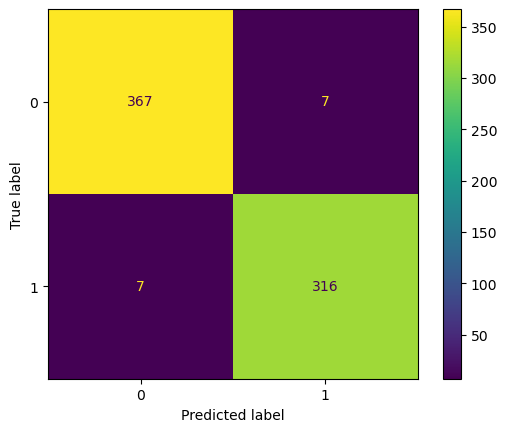

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_result = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, predicted_result)
print("Accuracy for logistic regression: ", accuracy)

matrix = confusion_matrix(y_test, predicted_result, labels=logistic_regression.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=logistic_regression.classes_)
display.plot()
plt.show()

The best params for DecisionTree Classifier are:  {'criterion': 'entropy', 'max_depth': 30, 'max_leaf_nodes': 40}


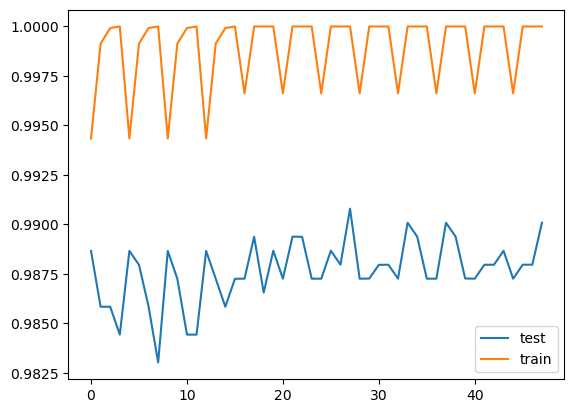

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_model = DecisionTreeClassifier()
decision_tree_params = {'criterion': ['gini', 'entropy', 'log_loss'], 
                        'max_depth': range(10, 50, 10), 'max_leaf_nodes': range(10, 50, 10)}

grid_search = GridSearchCV(decision_tree_model, param_grid=decision_tree_params, cv=10, return_train_score=True)
decision_tree = grid_search.fit(X_train, y_train)
best_params = decision_tree.best_params_
print("The best params for DecisionTree Classifier are: ", best_params)

test_scores = decision_tree.cv_results_['mean_test_score']
train_scores = decision_tree.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Accuracy for decision tree classifier:  0.9913916786226685


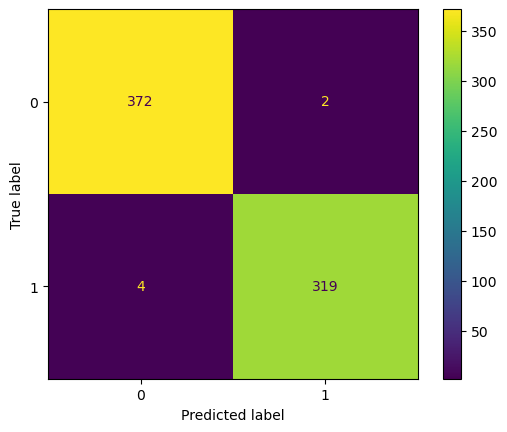

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_result = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, predicted_result)
print("Accuracy for decision tree classifier: ", accuracy)

matrix = confusion_matrix(y_test, predicted_result, labels=decision_tree.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=decision_tree.classes_)
display.plot()
plt.show()